In [1]:
pip install yfinance


Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl

In [3]:
initial_data = yf.download("ALGO-USD", start="2021-03-01", end="2022-03-01")

[*********************100%***********************]  1 of 1 completed


In [4]:
initial_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-01,1.019401,1.105371,1.010675,1.088458,1.088458,425868521
2021-03-02,1.088641,1.165859,1.043427,1.080691,1.080691,552897940
2021-03-03,1.081396,1.221840,1.060158,1.182144,1.182144,638690035
2021-03-04,1.182110,1.247893,1.053293,1.093431,1.093431,558601276
2021-03-05,1.092255,1.094815,1.009108,1.058036,1.058036,415618857


In [5]:
initial_data['Adj Close'].head()


Date
2021-03-01    1.088458
2021-03-02    1.080691
2021-03-03    1.182144
2021-03-04    1.093431
2021-03-05    1.058036
Name: Adj Close, dtype: float64

In [6]:
data =  initial_data['Adj Close']


In [7]:
data.head()


Date
2021-03-01    1.088458
2021-03-02    1.080691
2021-03-03    1.182144
2021-03-04    1.093431
2021-03-05    1.058036
Name: Adj Close, dtype: float64

In [8]:
data.tail()

Date
2022-01-30    0.945256
2022-01-31    0.952808
2022-02-01    0.967095
2022-02-02    0.924892
2022-03-01    0.856131
Name: Adj Close, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000207F14077F0>],
      dtype=object)

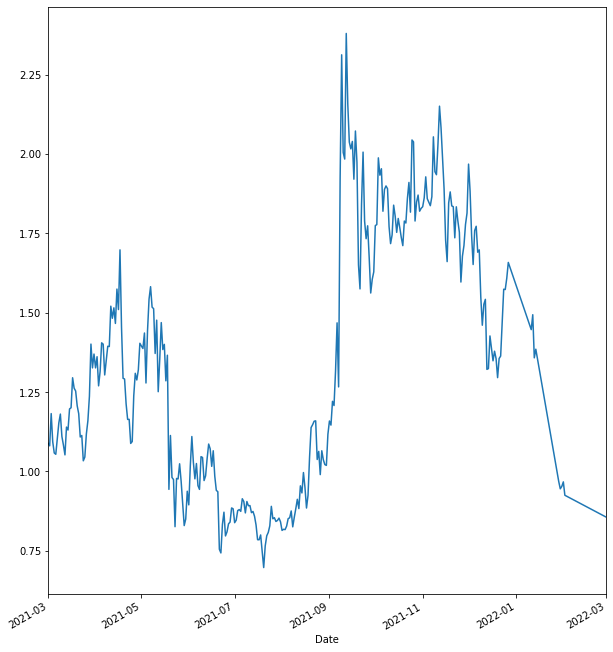

In [10]:
data.plot(figsize=(10, 12), subplots=True)

In [11]:
data.describe().round(2)


count    312.00
mean       1.34
std        0.40
min        0.70
25%        0.98
50%        1.29
75%        1.71
max        2.38
Name: Adj Close, dtype: float64

In [12]:
data.diff().head()


Date
2021-03-01         NaN
2021-03-02   -0.007767
2021-03-03    0.101453
2021-03-04   -0.088713
2021-03-05   -0.035395
Name: Adj Close, dtype: float64

In [13]:
data.diff().describe().round(2)


count    311.00
mean      -0.00
std        0.10
min       -0.42
25%       -0.05
50%        0.00
75%        0.05
max        0.66
Name: Adj Close, dtype: float64

In [14]:
data.pct_change().round(4).head()

Date
2021-03-01       NaN
2021-03-02   -0.0071
2021-03-03    0.0939
2021-03-04   -0.0750
2021-03-05   -0.0324
Name: Adj Close, dtype: float64

In [15]:
data=pd.DataFrame(data)

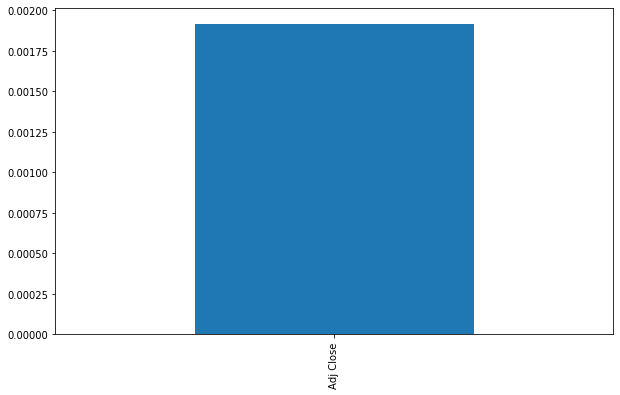

In [16]:
data.pct_change().mean().plot(kind='bar', figsize=(10, 6));

In [17]:
rets = np.log(data / data.shift(1))
rets.head().round(4)

,Adj Close
Date,
2021-03-01,NaN
2021-03-02,-0.0072
2021-03-03,0.0897
2021-03-04,-0.0780
2021-03-05,-0.0329


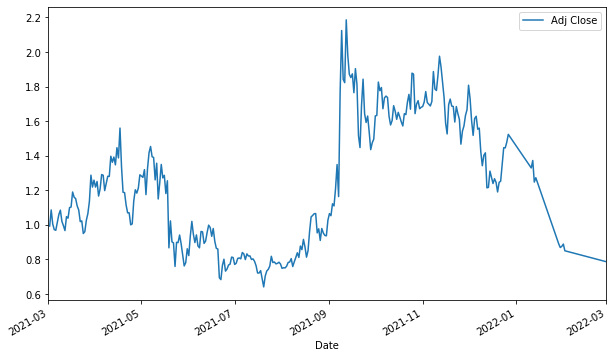

In [18]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6));


In [19]:
data.resample('1w', label='right').last().head()

,Adj Close
Date,
2021-03-07,1.103649
2021-03-14,1.130390
2021-03-21,1.181771
2021-03-28,1.236743
2021-04-04,1.314932


In [20]:
data.resample('1m', label='right').last().head()


,Adj Close
Date,
2021-03-31,1.369683
2021-04-30,1.403603
2021-05-31,0.937608
2021-06-30,0.882368
2021-07-31,0.841249


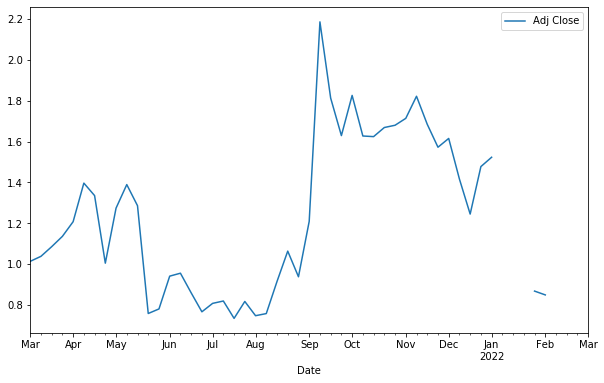

In [22]:
rets.cumsum().apply(np.exp). resample('1w', label='right').last().plot(figsize=(10, 6))

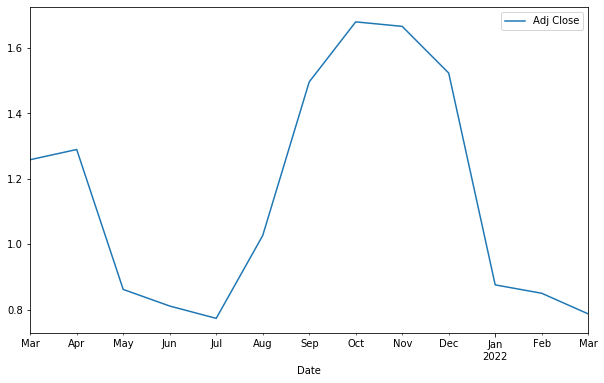

In [23]:
rets.cumsum().apply(np.exp). resample('1m', label='right').last().plot(figsize=(10, 6))

# VOLATILTY

In [24]:
import numpy as np
import pandas as pd

In [25]:
df = yf.download("ALGO-USD", start="2020-12-01", end="2021-12-01")

[*********************100%***********************]  1 of 1 completed


In [26]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-27,1.602864,1.725487,1.602864,1.678012,1.678012,392327404
2021-11-28,1.681224,1.713677,1.583598,1.711715,1.711715,339904708
2021-11-29,1.712651,1.826690,1.697671,1.777569,1.777569,454280625
2021-11-30,1.773564,1.873351,1.735184,1.813682,1.813682,511222408
2021-12-01,1.809628,2.021070,1.804040,1.967895,1.967895,786558602


In [27]:
import numpy as np
normal_return = []
for i in range(0,len(df)-1):
    adjclose_yesterday = df.iloc[i]['Adj Close']
    adjclose_today = df.iloc[i+1]['Adj Close']
    x = (adjclose_today - adjclose_yesterday) / adjclose_yesterday
    normal_return.append(x)
normal_return[:5]

[0.1056066304096274,
 -0.00286797452863932,
 -0.040393782745983015,
 0.054196605744839296,
 -0.021858159738359213]

In [28]:
log_return = []
for i in range(0,len(df)-1):
    adjclose_yesterday = df.iloc[i]['Adj Close']
    adjclose_today = df.iloc[i+1]['Adj Close']
    y = np.log(adjclose_today / adjclose_yesterday)
    log_return.append(y)
log_return[:5]

[0.1003941711276377,
 -0.002872095047836288,
 -0.04123226903173278,
 0.052778965688803435,
 -0.022100588520917137]

In [29]:
dfnr = pd.DataFrame(normal_return, columns = ['normal']) 
nr = dfnr.mean() * len(dfnr)
nv = dfnr.std() * (len(dfnr) ** 0.5)
print('The annulized normal return is %.8f and its annulized volatility is %.8f' % (nr,nv))

The annulized normal return is 2.88950555 and its annulized volatility is 1.46788220


In [30]:
dflr = pd.DataFrame(log_return, columns = ['log']) 
lr = dflr.mean() * len(dflr)
lv = dflr.std() * (len(dflr) ** 0.5)
print('The annulized log return is %.8f and its annulized volatility is %.8f' % (lr,lv))

The annulized log return is 1.85117782 and its annulized volatility is 1.42856788


# BINOMIAL TREE


In [39]:
import numpy as np
import os

In [40]:
S0 = 1.967895             # spot stock price
K = 1.80000               # strike
T = 1/52                   # maturity 
r = 0.0166                # risk free rate 
sig = 1.43                 # diffusion coefficient or volatility
N = 4                      # number of periods or number of time steps  
payoff = "put"  

In [41]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u 

In [42]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [43]:
S

array([[1.967895  , 2.17301826, 2.39952251, 2.6496364 , 2.92582088],
       [0.        , 1.78213446, 1.967895  , 2.17301826, 2.39952251],
       [0.        , 0.        , 1.6139089 , 1.78213446, 1.967895  ],
       [0.        , 0.        , 0.        , 1.46156308, 1.6139089 ],
       [0.        , 0.        , 0.        , 0.        , 1.32359802]])

In [44]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.4756339291852674

In [45]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.1860911 ],
       [0.        , 0.        , 0.        , 0.        , 0.47640198]])

# EUROPIAN OPTION

In [46]:
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[0.08703563, 0.02682411, 0.        , 0.        , 0.        ],
       [0.        , 0.14166461, 0.0511594 , 0.        , 0.        ],
       [0.        , 0.        , 0.22378024, 0.09757207, 0.        ],
       [0.        , 0.        , 0.        , 0.33829328, 0.1860911 ],
       [0.        , 0.        , 0.        , 0.        , 0.47640198]])

In [47]:
print('European ' + payoff, str( V[0,0]))

European put 0.08703562585054948


# MONTE CARLO SIMULATION

In [48]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [49]:
T = 1/52
r = 0.0166 
sigma = 1.43
S0 = 1.967895
K = 1.80000

In [50]:
S = mcs_simulation_np(1000)


In [51]:
S = np.transpose(S)
S


array([[1.967895  , 1.97846084, 1.96757165, ..., 2.56243002, 2.58342004,
        2.5980127 ],
       [1.967895  , 1.97484835, 1.98351404, ..., 2.51927179, 2.53157736,
        2.51544099],
       [1.967895  , 1.94775308, 1.94295991, ..., 1.63631731, 1.64362108,
        1.6339166 ],
       ...,
       [1.967895  , 1.97196217, 1.98423832, ..., 2.24898469, 2.25743765,
        2.25048846],
       [1.967895  , 1.95241066, 1.96611651, ..., 1.34253306, 1.32706258,
        1.33626073],
       [1.967895  , 1.97398517, 1.9894692 , ..., 1.65275053, 1.66438001,
        1.66276705]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

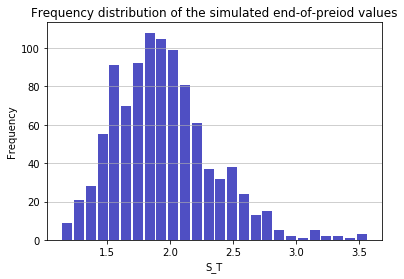

In [52]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [53]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('European put', str(p))

European put 0.08250424078228674


In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf

In [55]:
def euro_option_bs(S, K, T, r, vol, payoff):
    
     #S: spot price
     #K: strike price
     #T: time to maturity
     #r: risk free rate
     #vol: volatility of underlying asset
     #payoff: call or put
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [57]:
euro_option_bs(1.967895, 1.80000, 1/52,0.0166, 1.43, 'put')

0.07938056405820682

In [66]:
S = np.linspace(2.000000,1.80000,11)
cp = np.zeros((len(S),1))
for i in range(len(S)):
    cp[i] = euro_option_bs(S[i],1.967895, 1/52, 0.0166, 1.43, 'put')

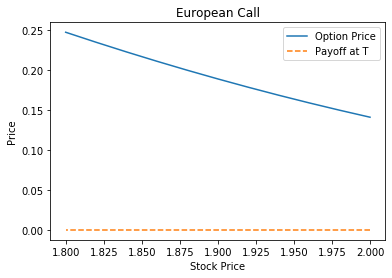

In [67]:
fig = plt.figure()
plt.plot(S, cp, '-')
plt.plot(S, np.maximum(S-100,0), '--')
plt.xlabel('Stock Price')
plt.ylabel('Price')
plt.title('European Call')
plt.legend(['Option Price','Payoff at T'])

# GREEKS

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si

# DELTA

# Delta, ∆, measures the rate of change of the theoretical option value with respect to changes in the underlying asset's price. Delta is the first derivative of the value V of the option with respect to the underlying instrument's price S.

In [69]:
def delta(S, K, T, r, q, vol, payoff):
    
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [70]:
delta(1.967895, 1.80000, 1/52, 0.0166, 0, 1.43, 'put')

-0.29100132517006677

In [76]:
S = np.linspace(2.000000,1.80000,11)
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
        Delta_Put [i] = delta(S[i], 1.967895, 1/52, 0.0166, 0, 1.43, 'put')

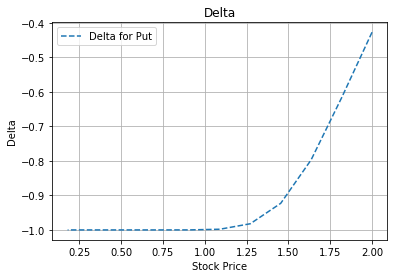

In [72]:
fig = plt.figure()
plt.plot(S, Delta_Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Put'])

# GAMMA

# Gamma, Γ, measures the rate of change in the delta with respect to changes in the underlying price. Gamma is the second derivative of the value function with respect to the underlying price.

In [74]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [75]:
gamma(1.967895, 1.80000, 1/52,0.0166, 0, 1.43, 'put')

0.8785700161784766

In [77]:
S = np.linspace(2.000000,1.80000,11)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 1.967895, 1/52, 0.0166, 0, 1.43, 'put')

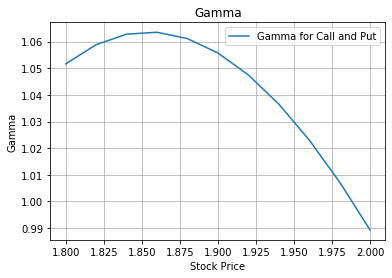

In [78]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call and Put'])

# THETA

# THETA, Θ, measures the sensitivity of the value of the derivative to the passage of time the "time decay."

In [80]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [81]:
theta(1.967895, 1.80000, 1/52,0.066, 0, 1.43, 'put')

3.512322213780736

In [82]:
T = np.linspace(2.000000,1.80000,11)
Theta_Call = np.zeros((len(T),1))
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
        Theta_Put [i] = theta(1.967895, 1.80000, T[i], 0.066, 0, 1.43, 'put')

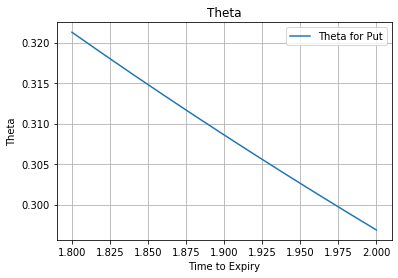

In [83]:
fig = plt.figure()
plt.plot(T, Theta_Put, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Put'])

# RHO

# Rho, 𝜌, measures sensitivity to the interest rate: it is the derivative of the option value with respect to the risk free interest rate (for the relevant outstanding term).

In [84]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [85]:
rho(1.967895, 1.80000, 1/52,0.066, 0, 1.43, 'put')

-0.01246528912623317

In [86]:
r = np.linspace(2.000000,1.80000,11)
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
        Rho_Put [i] = rho(1.967895, 1.80000, 1/52, 0.066, 0, 1.43, 'put')

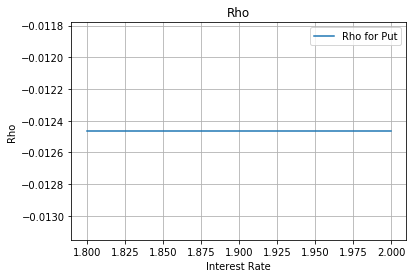

In [87]:
fig = plt.figure()
plt.plot(r, Rho_Put, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Put'])

# VEGA

# Vega measures sensitivity to volatility. Vega is the derivative of the option value with respect to the volatility of the underlying asset.

In [88]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [89]:
vega(1.967895, 1.80000, 1/52,0.066, 0, 1.43, 'put')

0.09331741101397267

In [90]:
vol = np.linspace(2.000000,1.80000,13)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(1.967895, 1.80000, 1/52,0.066, 0, vol[i], 'put')

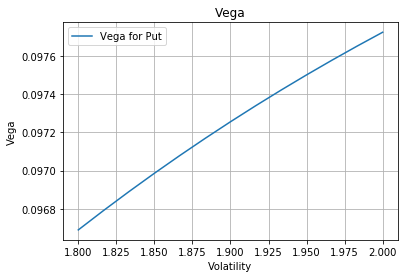

In [91]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega' )
plt.legend(['Vega for Put'])